In [ ]:
                                              # Test work on Pandas

## Individual task 3.

In [1]:
import numpy as np
import pandas as pd

data1 = {'Branch':['Programming', 'Programming','Programming','Engeneering','Engeneering'],
                     'Grade':[1,2,3,1,2],
                     'Name':['C++ Programming Language', 'An introduction to Database Systems', 'Pandas for Data Analysis',
                            'Heat Engeneering', 'Enterprise managment'],
                     'Author':['Bjarne Stroustrup','C.J Date','Wes McKinney','John h.Lienhard', 'Jeff Thompson']}
df1 = pd.DataFrame(data1, columns=['Name','Author','Branch','Grade'])
#df1 = df1.set_index(['Branch','Grade'])
data2 = {'Name':['C++ Programming Language', 'An introduction to Database Systems', 'Pandas for Data Analysis',
                            'Heat Engeneering', 'Enterprise managment'],
        'Publisher':['BHV','Springer','O`Reilly','Rearson Education','Cambridge'],
        'Pages':[681,1360,541,678,385], 'Year':[1973,2011, 2013,1981,2012],'Hard cover':[True, False, True, False, False]}
df2 = pd.DataFrame(data2, columns=['Name','Publisher','Pages','Year','Hard cover'])
#df2 = df2.set_index(['Name'])
res = pd.merge(df1,df2,on='Name',how='outer')
res = res.set_index(['Name'])
res

,Author,Branch,Grade,Publisher,Pages,Year,Hard cover
Name,,,,,,,
C++ Programming Language,Bjarne Stroustrup,Programming,1,BHV,681,1973,True
An introduction to Database Systems,C.J Date,Programming,2,Springer,1360,2011,False
Pandas for Data Analysis,Wes McKinney,Programming,3,O`Reilly,541,2013,True
Heat Engeneering,John h.Lienhard,Engeneering,1,Rearson Education,678,1981,False
Enterprise managment,Jeff Thompson,Engeneering,2,Cambridge,385,2012,False


In [2]:
year = 2010
res["Last 10 years"] = res["Year"].apply(lambda x: 1 if x>=year else 0 )
res

,Author,Branch,Grade,Publisher,Pages,Year,Hard cover,Last 10 years
Name,,,,,,,,
C++ Programming Language,Bjarne Stroustrup,Programming,1,BHV,681,1973,True,0
An introduction to Database Systems,C.J Date,Programming,2,Springer,1360,2011,False,1
Pandas for Data Analysis,Wes McKinney,Programming,3,O`Reilly,541,2013,True,1
Heat Engeneering,John h.Lienhard,Engeneering,1,Rearson Education,678,1981,False,0
Enterprise managment,Jeff Thompson,Engeneering,2,Cambridge,385,2012,False,1


In [3]:
def task_4():
    new_df = res.groupby(['Year']).agg('min').head(2)
    author = list(new_df['Author'])[1]
    col = res.index[res['Author'] == author].tolist()[0]
    a = new_df.index[new_df['Author'] == author].tolist()[0]
    return (a,col)
task_4()

(1981, 'Heat Engeneering')

In [4]:
def filter_func(x):
    mean_pages = res['Pages'].mean()
    return x['Pages']>=mean_pages

res.groupby('Pages').filter(filter_func)

,Author,Branch,Grade,Publisher,Pages,Year,Hard cover,Last 10 years
Name,,,,,,,,
An introduction to Database Systems,C.J Date,Programming,2,Springer,1360,2011,False,1


In [5]:
grade = res.groupby(['Grade'])['Grade'].count()
min_val =  res.groupby(['Grade'])['Grade'].count().min()
print('Grade - ',grade.index[grade.values == min_val][0])

Grade -  3


In [6]:
min_page  = res['Pages'].min()
res[(res['Pages']==min_page) & (res['Hard cover']==False)]

,Author,Branch,Grade,Publisher,Pages,Year,Hard cover,Last 10 years
Name,,,,,,,,
Enterprise managment,Jeff Thompson,Engeneering,2,Cambridge,385,2012,False,1


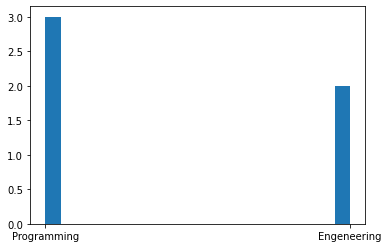

In [7]:
from matplotlib import pyplot as plt

x = [res['Branch']]
plt.hist(x,bins=20)
plt.show()